# 5장 시각화 라이브러리II

## 5.2 시본(Seaborn) 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('C:/Users/mandujoayo/데처프/10월12일/05_data1.xlsx')
data.head()

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no             3000 non-null   int64  
 1   city_code      3000 non-null   int64  
 2   gender         3000 non-null   int64  
 3   age_code       3000 non-null   int64  
 4   height         3000 non-null   int64  
 5   weight         3000 non-null   int64  
 6   waist          3000 non-null   float64
 7   systolic       3000 non-null   int64  
 8   diastolic      3000 non-null   int64  
 9   blood_sugar    3000 non-null   int64  
 10  cholesterol    3000 non-null   int64  
 11  triglycerides  3000 non-null   int64  
 12  HDL            3000 non-null   float64
 13  LDL            3000 non-null   int64  
 14  hemoglobin     3000 non-null   float64
 15  serum          3000 non-null   float64
 16  smoking        3000 non-null   int64  
 17  drinking       3000 non-null   int64  
dtypes: float

In [3]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='M'
data6.loc[data6['gender']==2,['gender']]='F'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

In [4]:
drinking = data6.groupby(['gender','drinking'])['drinking'].count()
smoking = data6.groupby(['gender','smoking'])['smoking'].count()
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
smoking = smoking.reset_index()

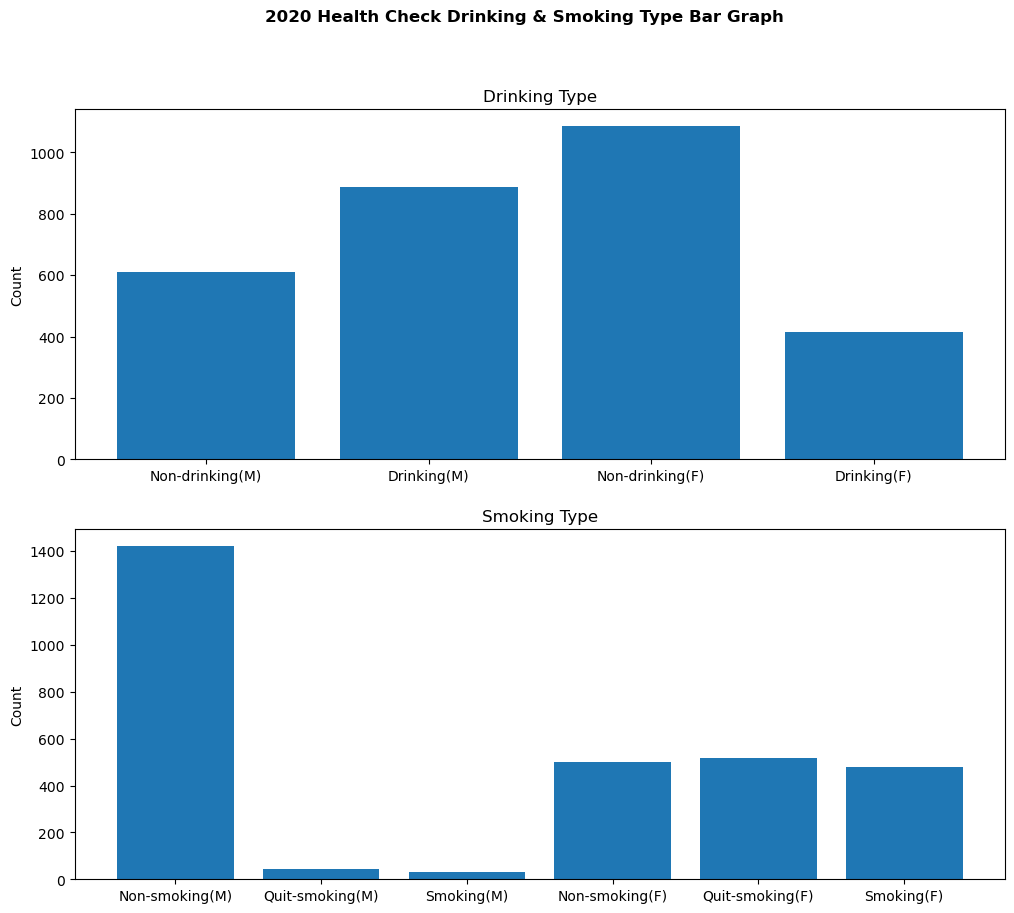

In [5]:
fig = plt.figure(figsize=(12,10))
fig.suptitle('2020 Health Check Drinking & Smoking Type Bar Graph',fontweight='bold')
index1 = np.arange(4)
index2 = np.arange(6)

fig.add_subplot(2,1,1)

plt.bar(index1, drinking['count'])
plt.title('Drinking Type')
plt.ylabel('Count')
plt.xticks(index1, ['Non-drinking(M)','Drinking(M)','Non-drinking(F)','Drinking(F)'])

fig.add_subplot(2,1,2)

plt.bar(index2, smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
plt.xticks(index2, ['Non-smoking(M)','Quit-smoking(M)','Smoking(M)','Non-smoking(F)','Quit-smoking(F)','Smoking(F)'])

plt.show()

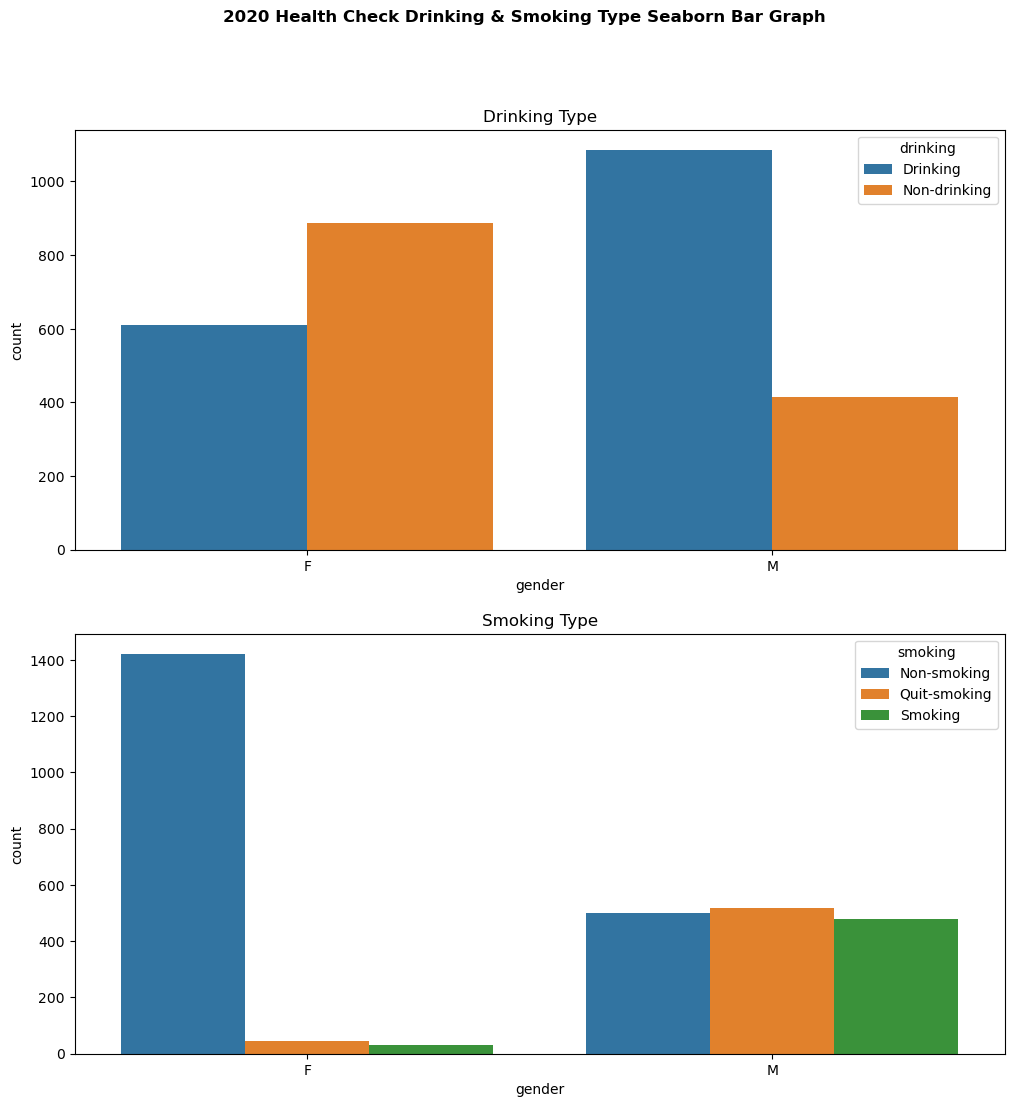

In [6]:
fig = plt.figure(figsize=(12,12))

area1 = fig.add_subplot(2,1,1)
area2 = fig.add_subplot(2,1,2)

ax1=sns.barplot(x='gender',y='count',hue='drinking',data=drinking,ax=area1)
ax2=sns.barplot(x='gender',y='count',hue='smoking',data=smoking,ax=area2)

fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph',fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

plt.show()

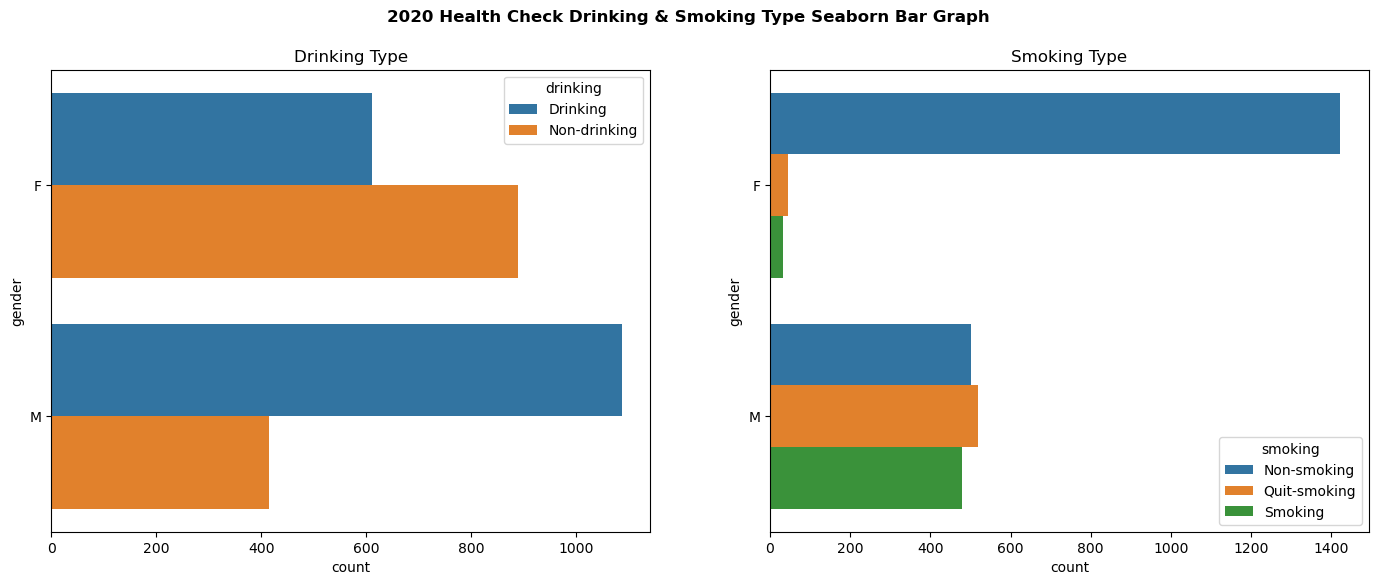

In [7]:
fig = plt.figure(figsize=(17,6))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

ax1=sns.barplot(y='gender',x='count',hue='drinking',data=drinking,ax=area1)
ax2=sns.barplot(y='gender',x='count',hue='smoking',data=smoking,ax=area2)

fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph',fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

plt.show()

In [8]:
maledata=data6.loc[data6.gender=='M',['gender','height','weight','waist','drinking','smoking']]
femaledata=data6.loc[data6.gender=='F',['gender','height','weight','waist','drinking','smoking']]

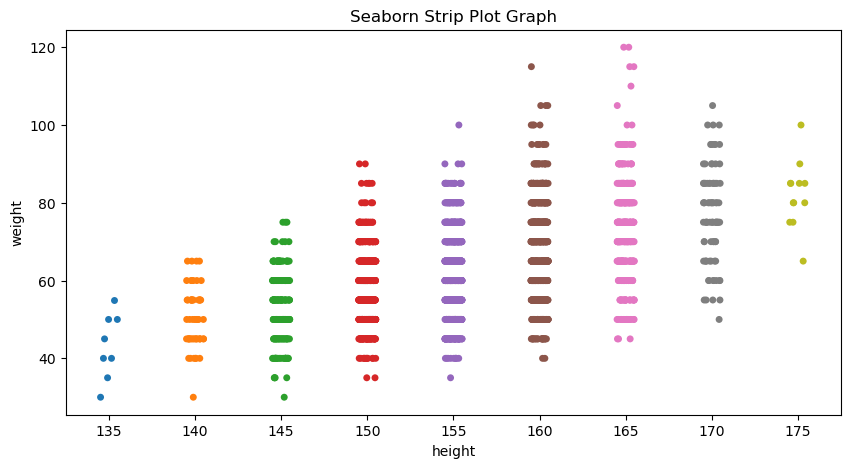

In [9]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph')

sns.stripplot(x='height', y='weight', data=maledata)
sns.stripplot(x='height', y='weight', data=femaledata)
plt.show()

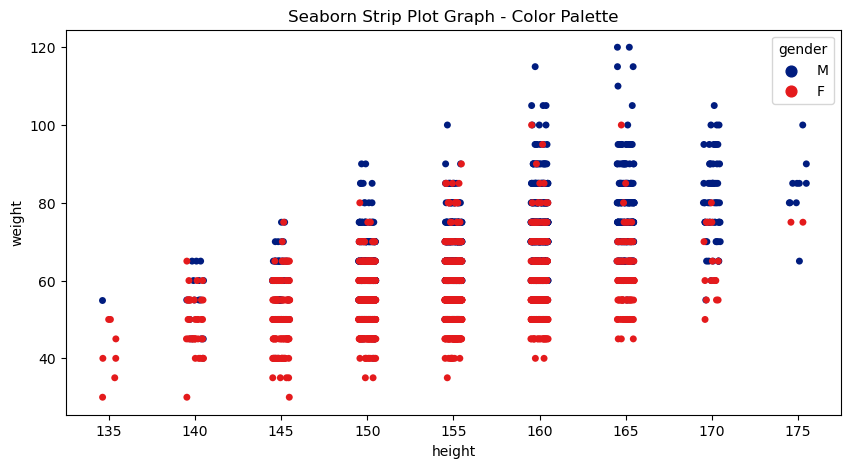

In [10]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph - Color Palette')

sns.stripplot(x='height',y='weight',data=maledata,hue='gender',palette='dark')
sns.stripplot(x='height',y='weight',data=femaledata,hue='gender',palette='Set1')
plt.show()

In [11]:
maledata100 = maledata.head(100)
femaledata100 = femaledata.head(100)

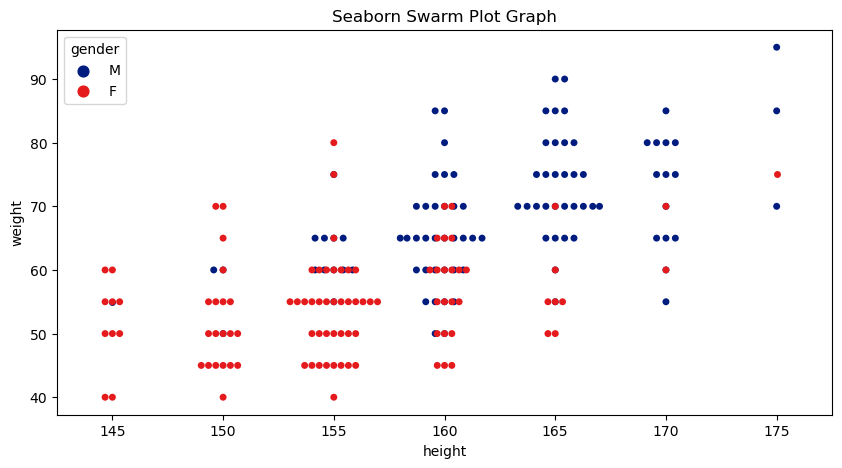

In [12]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(x='height',y='weight',data=maledata100,hue='gender',palette='dark')
sns.swarmplot(x='height',y='weight',data=femaledata100,hue='gender',palette='Set1')
plt.show()

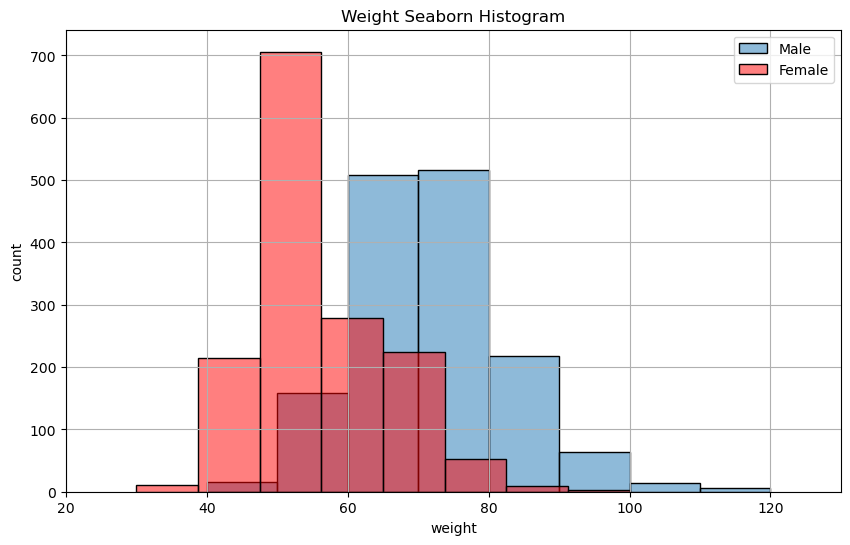

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(maledata['weight'],bins=8,alpha=0.5,label='Male')
sns.histplot(femaledata['weight'],bins=8,alpha=0.5,label='Female',color='r')

plt.xlim(20,130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()

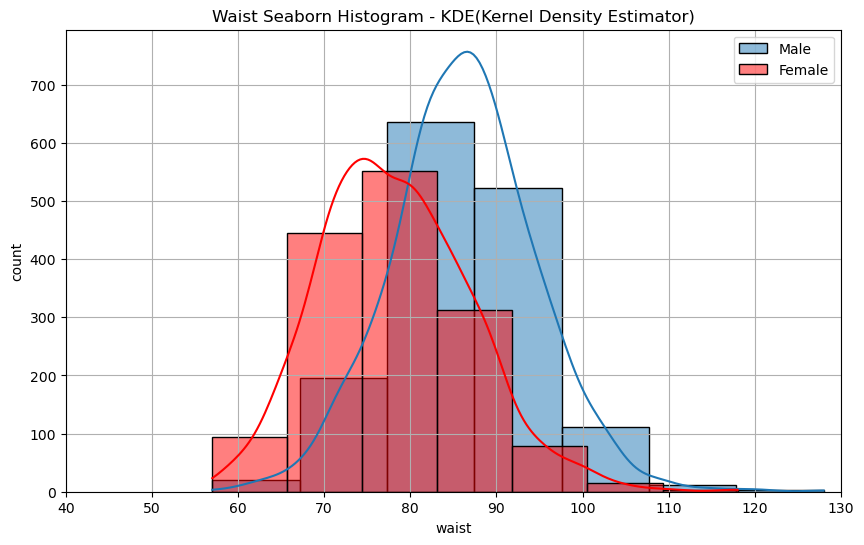

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(maledata['waist'],bins=7,alpha=0.5,label='Male',kde=True)
sns.histplot(femaledata['waist'],bins=7,alpha=0.5,label='Female',color='r',kde=True)

plt.xlim(40,130)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()

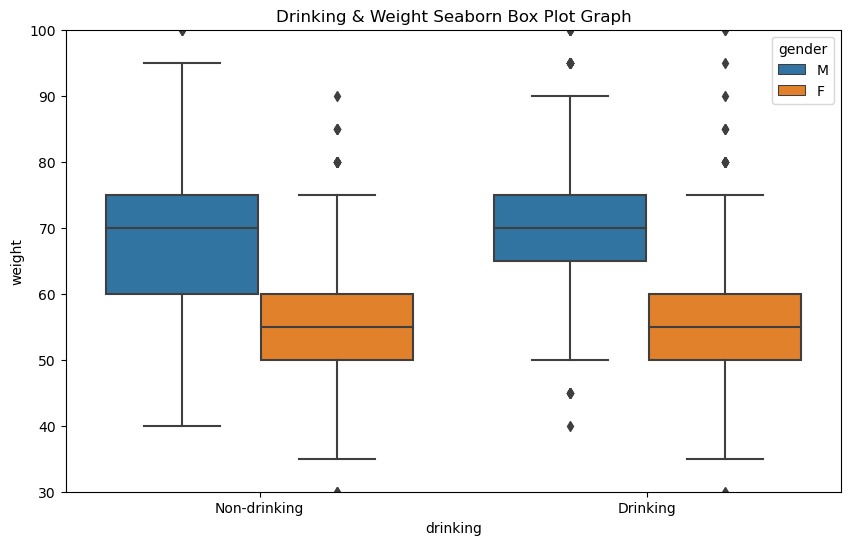

In [15]:
plt.figure(figsize=(10,6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

sns.boxplot(x='drinking',y='weight',hue='gender',data=data6)
plt.ylim(30,100)
plt.show()

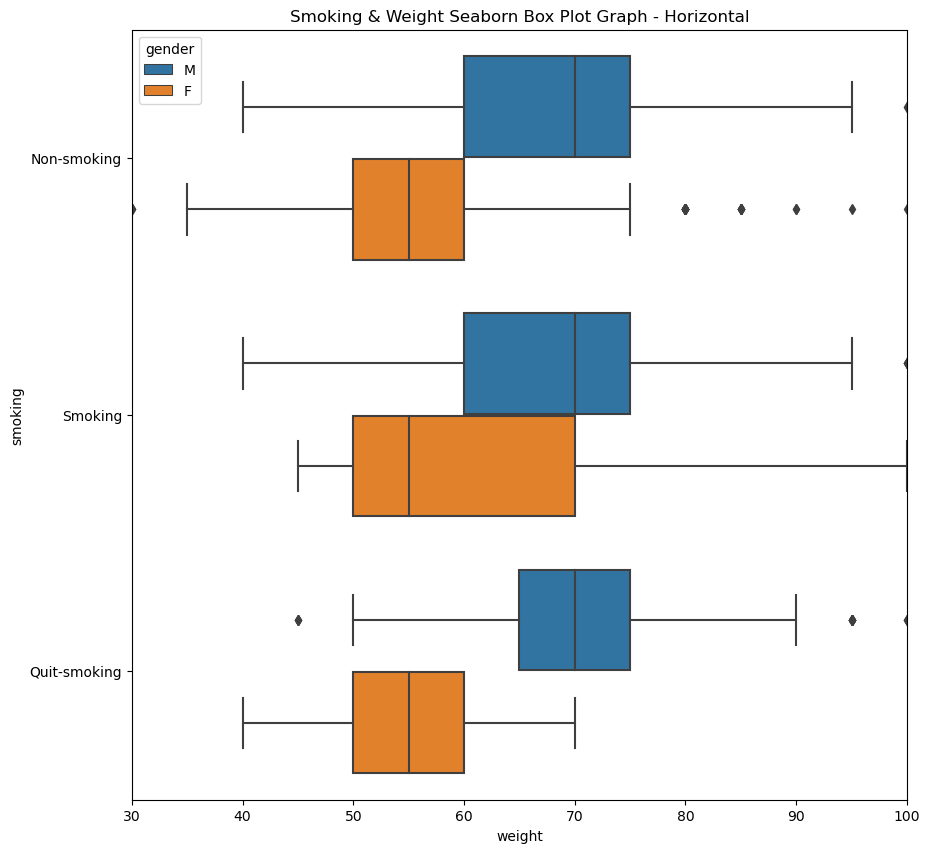

In [16]:
plt.figure(figsize=(10,10))
plt.title('Smoking & Weight Seaborn Box Plot Graph - Horizontal')

sns.boxplot(x='weight',y='smoking',hue='gender',data=data6,orient='h')
plt.xlim(30,100)
plt.show()

<AxesSubplot:title={'center':'Drinking Count Plot Graph'}, xlabel='drinking', ylabel='count'>

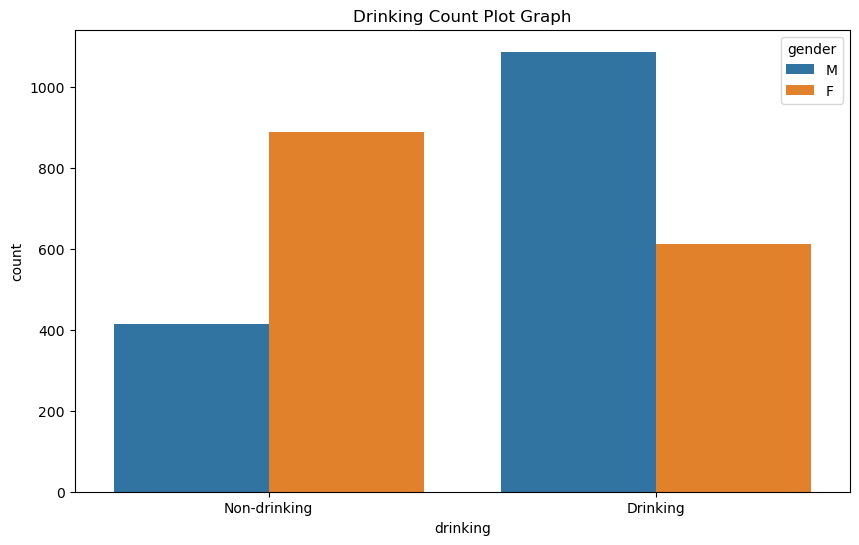

In [17]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph')
sns.countplot(x='drinking',hue='gender',data=data6)

<AxesSubplot:title={'center':'Smoking Count Plot Graph - Horizontal'}, xlabel='count', ylabel='smoking'>

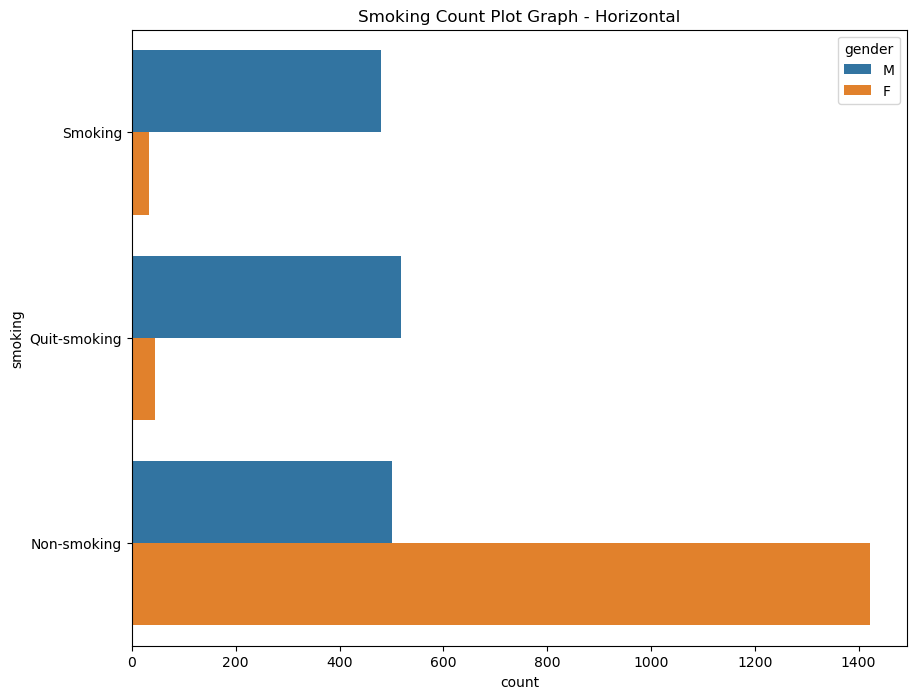

In [18]:
plt.figure(figsize=(10,8))
plt.title('Smoking Count Plot Graph - Horizontal')
sns.countplot(y='smoking',hue='gender',data=data6,order=['Smoking','Quit-smoking','Non-smoking'])

<AxesSubplot:title={'center':'Gender Weight Violin Plot Graph - Drinking category'}, xlabel='gender', ylabel='weight'>

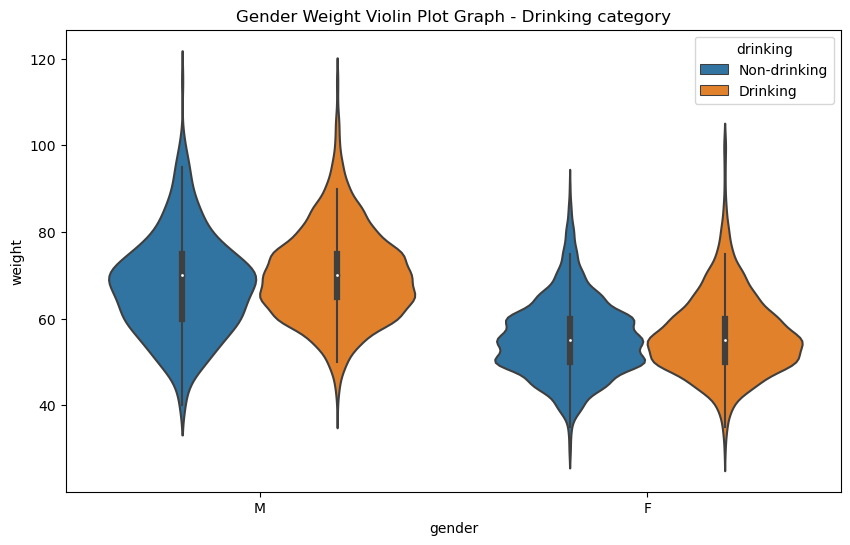

In [19]:
plt.figure(figsize=(10,6))
plt.title('Gender Weight Violin Plot Graph - Drinking category')
sns.violinplot(x='gender',y='weight',hue='drinking',data=data6[data6.weight<120])

<AxesSubplot:title={'center':'Gender Waist Violin Plot Graph - Drinking category'}, xlabel='waist', ylabel='gender'>

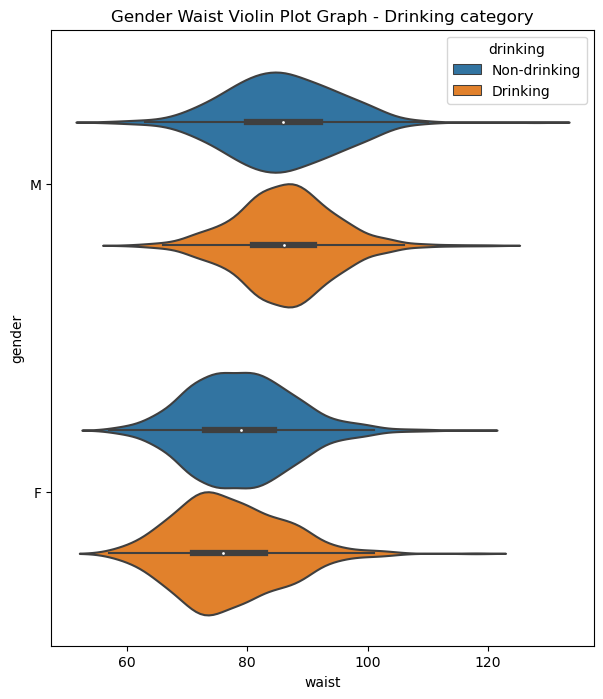

In [20]:
plt.figure(figsize=(7,8))
plt.title('Gender Waist Violin Plot Graph - Drinking category')
sns.violinplot(y='gender',x='waist',hue='drinking',data=data6[data6.waist<150])

In [21]:
data3 = data.loc[:,['gender','drinking','smoking']]
data8 = data.loc[:,['gender','weight','waist','drinking','smoking','cholesterol','HDL','LDL']]

<AxesSubplot:title={'center':'3×3 Heat Map Graph'}>

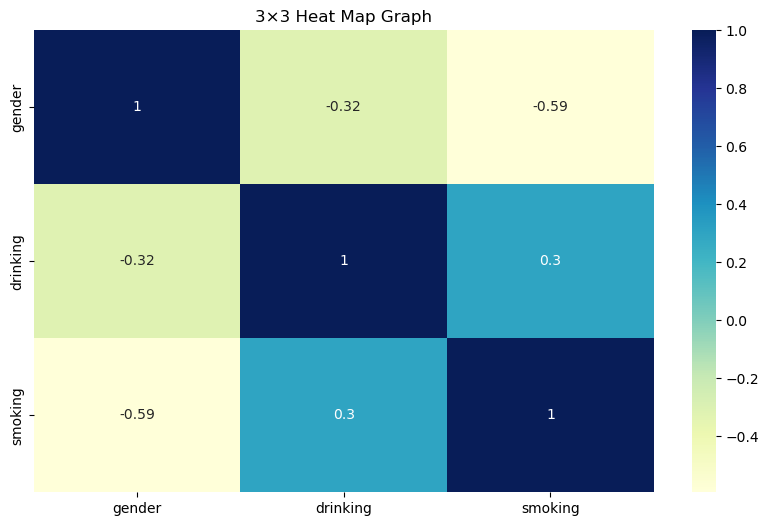

In [22]:
plt.figure(figsize=(10,6))
plt.title('3×3 Heat Map Graph')

correlation_data3 = data3.corr()
sns.heatmap(correlation_data3, annot=True, cmap='YlGnBu')

<AxesSubplot:title={'center':'8×8 Heat Map Graph'}>

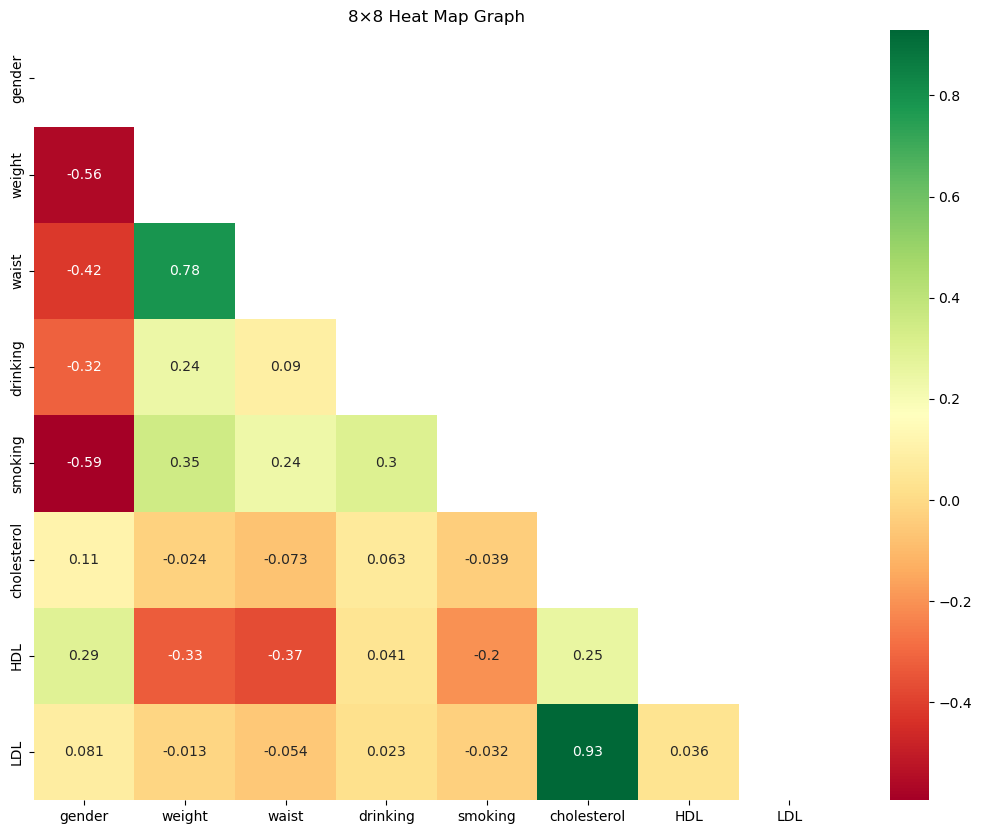

In [23]:
plt.figure(figsize=(13,10))
plt.title('8×8 Heat Map Graph')

correlation_data8= data8.corr()
upp_mat = np.triu(correlation_data8)

sns.heatmap(correlation_data8, annot=True, cmap='RdYlGn', mask=upp_mat)

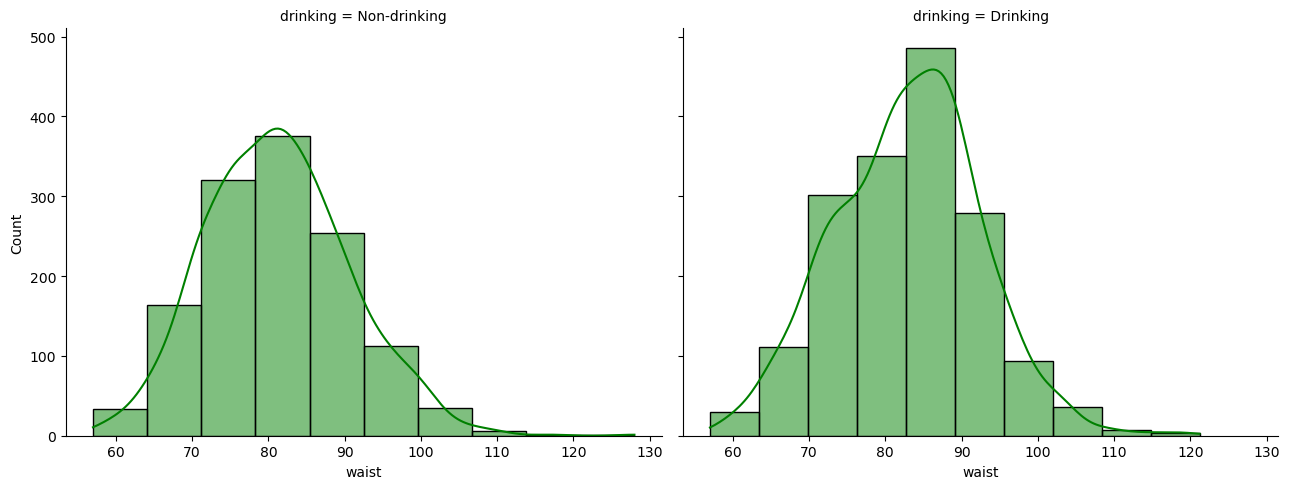

In [24]:
fg = sns.FacetGrid(data6,col='drinking',height=5,aspect=1.3)
fg.map(sns.histplot,'waist',bins=10,color='g',kde=True)

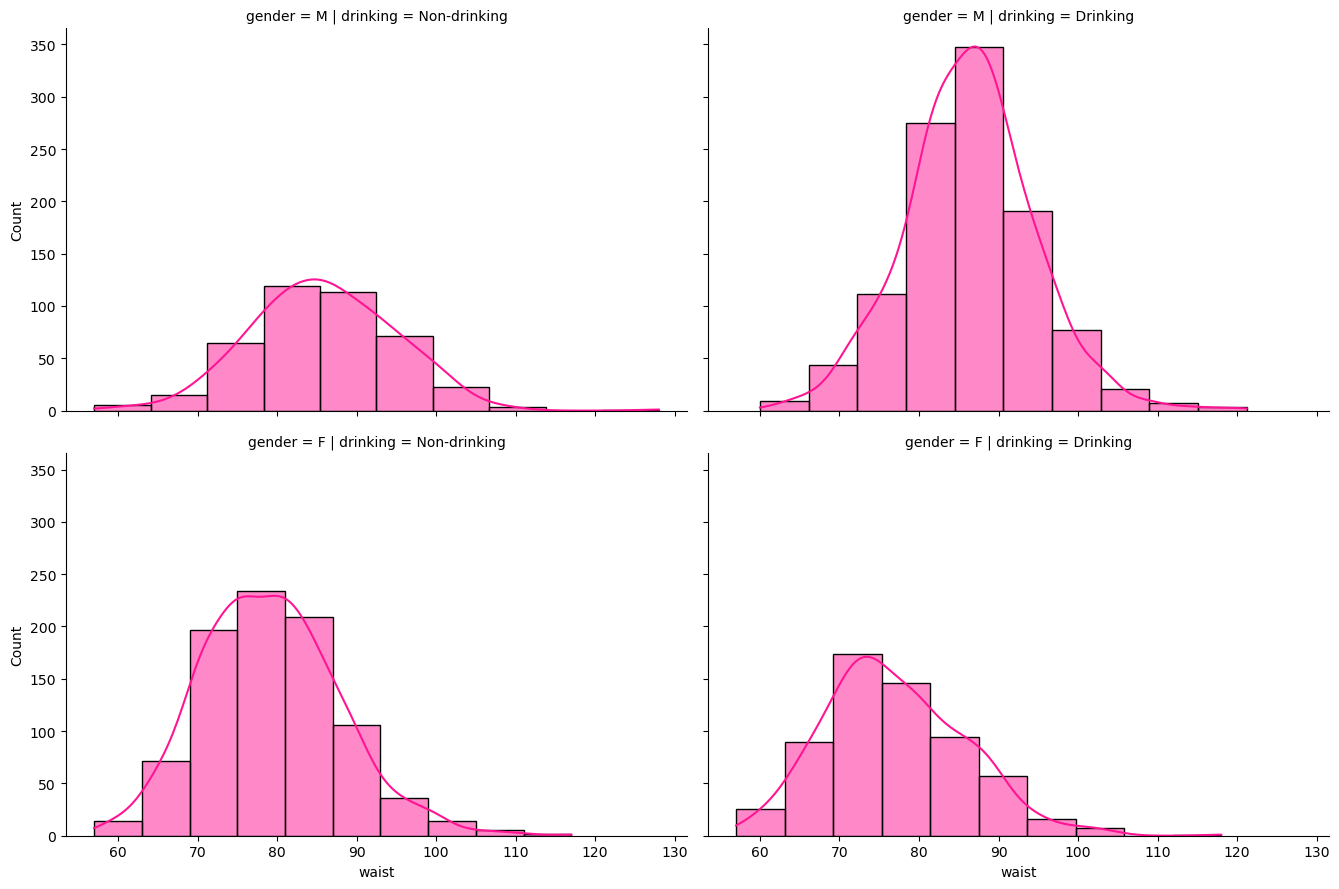

In [25]:
fg = sns.FacetGrid(data6,row='gender',col='drinking',height=4.5,aspect=1.5)
fg.map(sns.histplot,'waist',bins=10,color='deeppink',kde=True)

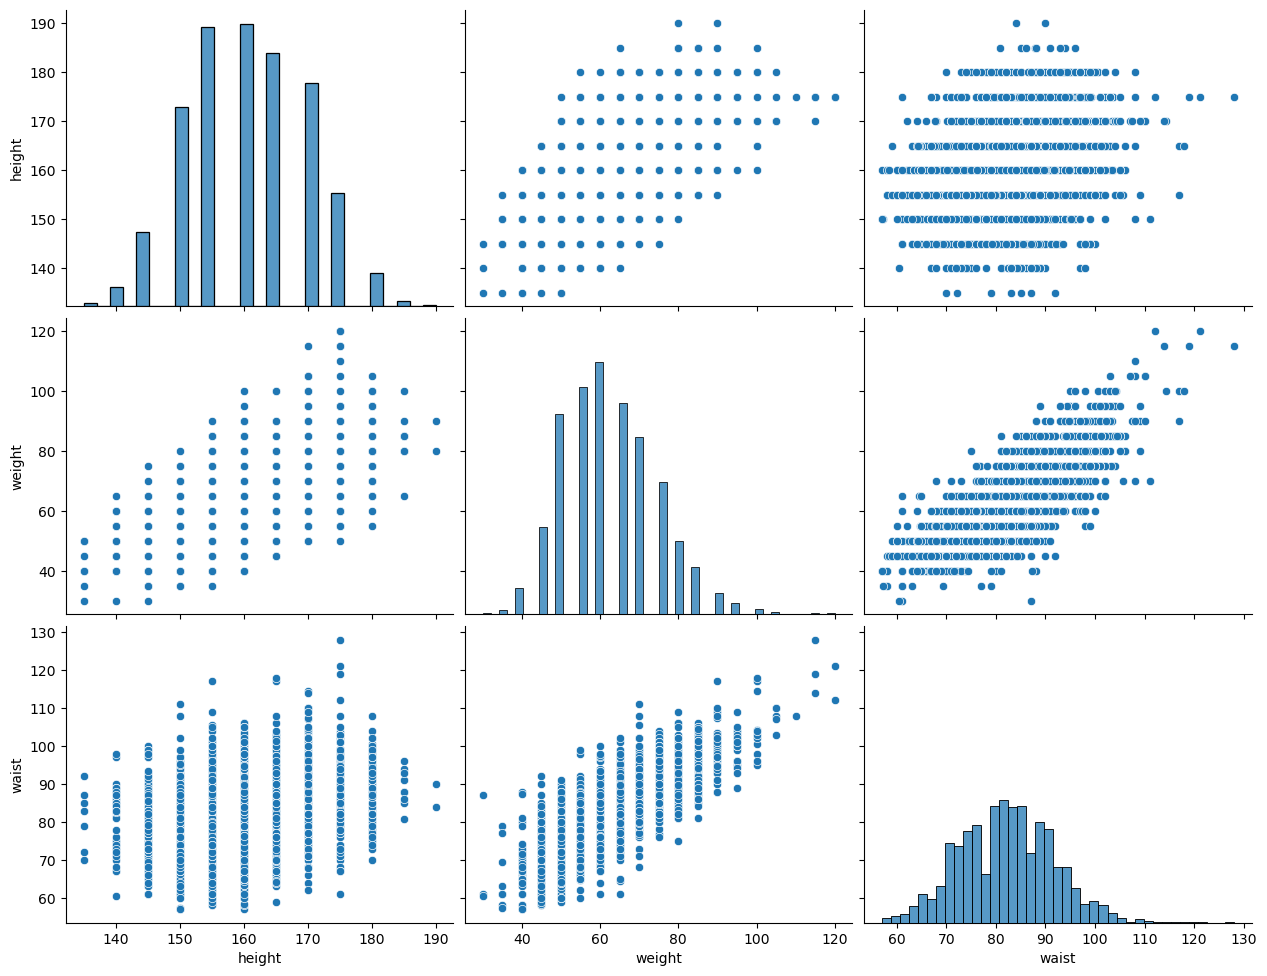

In [26]:
pp = sns.pairplot(data6,height=3.3,aspect=1.3)

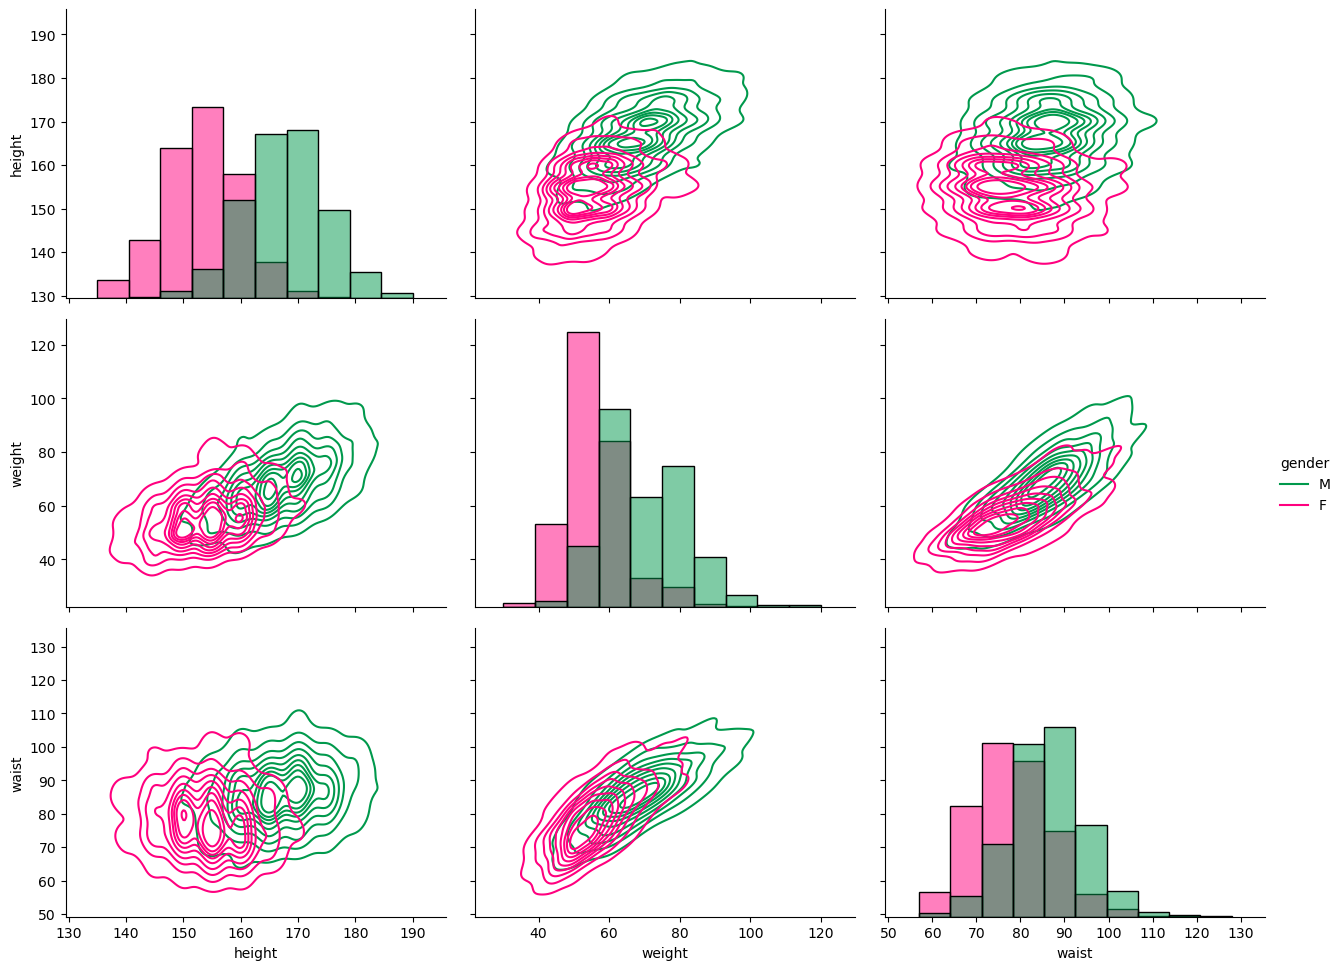

In [27]:
color = ['#00994C', '#FF007F']
pp = sns.PairGrid(data6,hue='gender',palette=color,height=3.3,aspect=1.3)
pp.map_diag(sns.histplot,bins=10)
pp.map_offdiag(sns.kdeplot)
pp.add_legend()